<a href="https://colab.research.google.com/github/ofernis/ML-introduction---Data-Preparation/blob/main/major_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns

In [83]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [84]:
dataset = pd.read_csv(filename)

In [85]:
dataset

,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
0,312,7,F,24.7,A+,"('32.44874', '-99.73314')",2,8,312.3,3,...,159.851645,26.157901,5.694267,9.922768,0.792541,6.606938,2.093085,-36.636500,-1,-1
1,787,21,M,86.3,O-,"('38.07789', '13.44275')",4,6,641.5,1,...,307.760691,362.804629,3.345775,10.055587,-17.976100,8.420971,2.407452,-28.067254,1,1
2,1150,28,M,98.9,O+,"('38.07789', '13.44275')",1,9,864.2,9,...,38.387342,82.544080,8.345576,21.955904,-20.950704,2.668036,3.235283,-63.154721,1,1
3,947,20,F,55.9,O+,"('51.40148', '-1.32471')",3,8,428.3,3,...,70.670443,191.832448,5.840627,1.902177,12.292326,1.448408,1.142477,-29.931566,-1,-1
4,889,44,M,47.2,O+,"('44.27804', '-88.27205')",3,7,371.1,1,...,104.775703,315.286222,6.270290,3.917101,-23.249245,5.782666,-1.987305,-36.738930,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1028,32,F,54.0,O+,"('52.48173', '-2.12139')",1,9,398.6,4,...,230.673964,113.357304,3.546478,9.887626,-15.049791,2.648537,-7.426141,-27.794776,1,1
1246,286,36,M,73.4,A-,"('10.31672', '123.89071')",2,7,563.1,2,...,225.381155,62.891406,3.569395,21.487653,7.043367,4.045632,-9.099876,-39.155421,-1,-1
1247,1493,13,M,45.2,A+,"('25.92493', '73.66633')",1,9,725.4,13,...,144.908625,298.896857,9.801984,16.235470,3.034694,6.521679,6.662441,-65.905576,1,-1
1248,1750,35,M,98.2,O+,"('6.15038', '6.83042')",2,8,935.8,3,...,93.237439,133.925819,7.828380,5.998792,-12.805863,3.337705,-9.397418,-45.601124,1,-1


In [86]:
dataset.shape

(1250, 26)

In [87]:
print( dataset["num_of_siblings"].value_counts() )

1    399
2    317
0    271
3    161
4     62
5     31
6      6
7      2
8      1
Name: num_of_siblings, dtype: int64


In [88]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, train_size=0.8, random_state=157)

In [89]:
print("Correlation between PCR_01 and spread is: {:.3f}".format(train.corr().PCR_01.spread))
print("Correlation between PCR_02 and spread is: {:.3f}".format(train.corr().PCR_02.spread))
print("Correlation between PCR_09 and spread is: {:.3f}".format(train.corr().PCR_09.spread))

Correlation between PCR_01 and spread is: 0.081
Correlation between PCR_02 and spread is: 0.504
Correlation between PCR_09 and spread is: -0.039


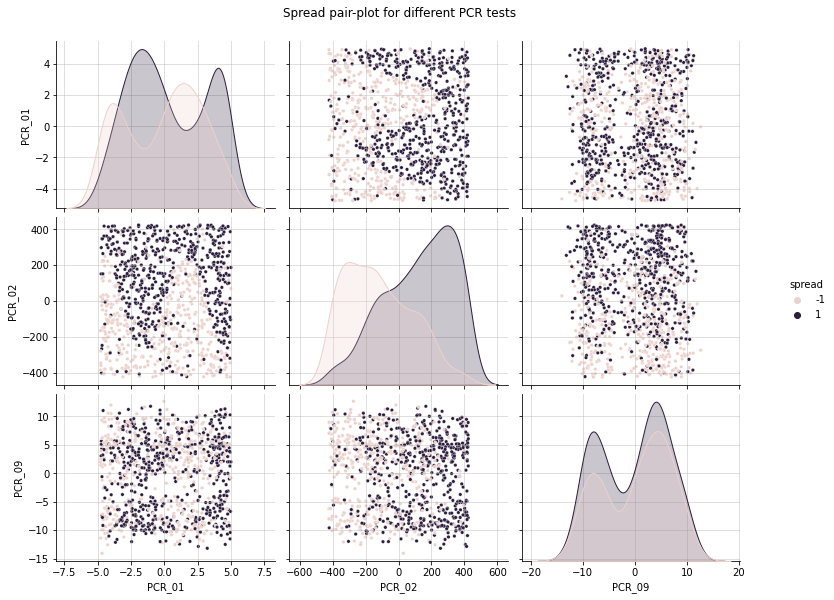

In [90]:
train_pcr_sub = train[["PCR_01", "PCR_02", "PCR_09", "spread"]]
g=sns.pairplot(train_pcr_sub, plot_kws={"s": 12}, hue="spread") 
g.fig.suptitle("Spread pair-plot for different PCR tests", y=1.04)
 
for ax in np.ravel(g.axes): 
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [140]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist

class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors
    self.points = None
    self.labels = None

  def fit(self, X, y):
    # self.set_params(X_train = X, y_train = y)
    self.points = X
    self.ylabels = y
    return self

  def predict(self, X):
    dist_mat = cdist(X, self.points)
    k_neighbors = np.argpartition(dist_mat, kth=self.n_neighbors)[ : ,  : self.n_neighbors]
    predictions = None
    k_neighbors_labels = np.array(self.ylabels)[k_neighbors.astype(int)]
    predictions = np.sign(np.array(np.sum(k_neighbors_labels, axis=1)))
    predictions[predictions == 0] = 1  
    return predictions

In [141]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

In [143]:
temp_X = train[["PCR_01", "PCR_02"]]
temp_y = train[["spread"]]

# temp_test_X = test[["PCR_01", "PCR_02"]]
# temp_test_y = test[["spread"]]

h = kNN(n_neighbors=1)
h.fit(X=temp_X, y=temp_y)
h.predict(temp_X)
h.score(temp_X, temp_y)
visualize_clf(h, temp_X, temp_y, 'DAG_AL_HA_DAG', 'AL', 'DAG')

TypeError: ignored

<Figure size 576x576 with 0 Axes>

In [93]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
import numpy as np

points = [[1,1], [3,3], [5,5], [7,7]]
X = [[2,2], [5,5], [8,8], [11,11]]

dist_mat = cdist(X, points)
dist_mat



array([[ 1.41421356,  1.41421356,  4.24264069,  7.07106781],
       [ 5.65685425,  2.82842712,  0.        ,  2.82842712],
       [ 9.89949494,  7.07106781,  4.24264069,  1.41421356],
       [14.14213562, 11.3137085 ,  8.48528137,  5.65685425]])

In [94]:
k_neighbors = np.argpartition(dist_mat, kth=2)
k_neighbors


array([[0, 1, 2, 3],
       [2, 1, 3, 0],
       [3, 2, 1, 0],
       [3, 2, 1, 0]])

In [95]:
k_neighbors = np.argpartition(dist_mat, kth=2)[ : ,  : 3]
k_neighbors


array([[0, 1, 2],
       [2, 1, 3],
       [3, 2, 1],
       [3, 2, 1]])

In [96]:
dist_mat[np.arange(dist_mat.shape[0])[:, None], k_neighbors]

array([[ 1.41421356,  1.41421356,  4.24264069],
       [ 0.        ,  2.82842712,  2.82842712],
       [ 1.41421356,  4.24264069,  7.07106781],
       [ 5.65685425,  8.48528137, 11.3137085 ]])

In [97]:
points_labels = [-1, 0, 1, 1]
test_labels = [1, -1, -1, 1]
k_neighbors_label = np.array(points_labels)[k_neighbors.astype(int)]
print(k_neighbors_label,"\n")
pred = np.sign(np.array(np.sum(k_neighbors_label, axis=1)))
pred[pred == 0] = 1
print(pred)

[[-1  0  1]
 [ 1  0  1]
 [ 1  1  0]
 [ 1  1  0]] 

[1 1 1 1]
